In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Data vis
import matplotlib.pyplot as plt
import seaborn as sns
#Data pro
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquake-damage-in-nepal/NepalEarhquakeDamage2015.csv


# This project was possible thanks to the lessons from WorldQuant university data science lab (project 4)

> # (1)Reading data & get information

In [80]:
df=pd.read_csv("/kaggle/input/earthquake-damage-in-nepal/NepalEarhquakeDamage2015.csv") # read data
df.head()

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
0,120101000011,12,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3
1,120101000021,12,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5
2,120101000031,12,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
3,120101000041,12,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
4,120101000051,12,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1


In [81]:
df.info() # get information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   building_id             762106 non-null  int64 
 1   district_id             762106 non-null  int64 
 2   count_floors_pre_eq     762106 non-null  int64 
 3   count_floors_post_eq    762106 non-null  int64 
 4   age_building            762106 non-null  int64 
 5   plinth_area_sq_ft       762106 non-null  int64 
 6   height_ft_pre_eq        762106 non-null  int64 
 7   height_ft_post_eq       762106 non-null  int64 
 8   land_surface_condition  762106 non-null  object
 9   foundation_type         762106 non-null  object
 10  roof_type               762106 non-null  object
 11  ground_floor_type       762106 non-null  object
 12  other_floor_type        762106 non-null  object
 13  position                762105 non-null  object
 14  plan_configuration      762105 non-n

In [82]:
df.isnull().sum() # show missing data 

building_id                0
district_id                0
count_floors_pre_eq        0
count_floors_post_eq       0
age_building               0
plinth_area_sq_ft          0
height_ft_pre_eq           0
height_ft_post_eq          0
land_surface_condition     0
foundation_type            0
roof_type                  0
ground_floor_type          0
other_floor_type           0
position                   1
plan_configuration         1
condition_post_eq          0
damage_grade              12
dtype: int64

> # (2) Data preprocessing

In [83]:
#Impute Missing Values with Mode
df['damage_grade'] = df['damage_grade'].fillna(df['damage_grade'].mode()[0])

In [84]:
def Data_handling(df):
   
    
    # Identify leaky columns
    drop_cols = [col for col in df.columns if "post_eq" in col]
    
    # Create binary target
    df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
    df["severe_damage"] = (df["damage_grade"] > 3).astype(int)    # encode as 0's and 1's

    # Drop old target
    drop_cols.append("damage_grade")

    # Drop multicolinearity column
    drop_cols.append("count_floors_pre_eq")

    # Drop high categorical features
    drop_cols.append("building_id")

    # Drop columns
    df.drop(columns=drop_cols, inplace=True)

    return df


In [85]:
cleaned_df = Data_handling(df) # Return clean data
cleaned_df.head()

,district_id,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,severe_damage
0,12,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
1,12,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,1
2,12,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
3,12,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
4,12,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0


<AxesSubplot:title={'center':'Class Balance'}, xlabel='Severe Damage', ylabel='Relative Frequency'>

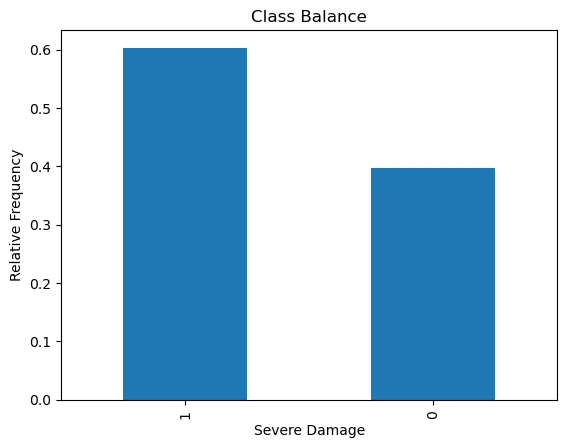

In [86]:
cleaned_df["severe_damage"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Severe Damage", ylabel="Relative Frequency", title="Class Balance")

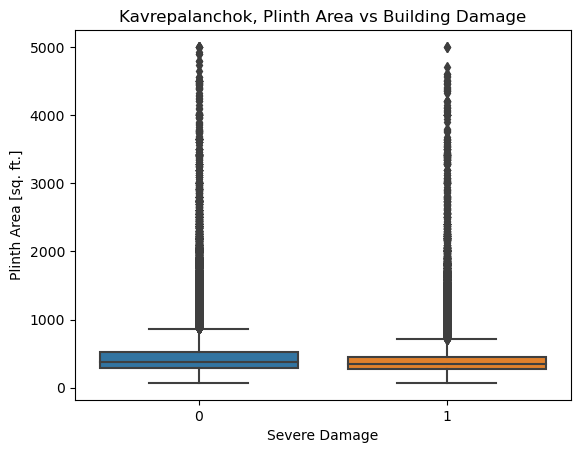

In [87]:
sns.boxplot(x="severe_damage", y="plinth_area_sq_ft", data=cleaned_df)
plt.xlabel("Severe Damage")
plt.ylabel("Plinth Area [sq. ft.]")
plt.title("Kavrepalanchok, Plinth Area vs Building Damage");

In [88]:
# Are buildings with certain roof types more likely to suffer severe damage?
roof_pivot = pd.pivot_table(
    cleaned_df, index="roof_type", values="severe_damage", aggfunc=np.mean    # roof_type: column in table
).sort_values(by="severe_damage")
roof_pivot

,severe_damage
roof_type,
RCC/RB/RBC,0.058788
Bamboo/Timber-Light roof,0.636005
Bamboo/Timber-Heavy roof,0.639063


> # (3) split

In [89]:
train=cleaned_df.drop(columns="severe_damage")   
test =df["severe_damage"]       
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (762106, 11)
y shape: (762106,)


In [90]:
# Divide your dataset into training and test 
X_train, X_test, y_train, y_test =train_test_split(
   train, test, test_size=0.2, random_state=42)

## Divide your dataset into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 42) 


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (457263, 11)
y_train shape: (457263,)
X_test shape: (152422, 11)
y_test shape: (152422,)
X_val shape: (152421, 11)
y_val shape: (152421,)


> # (4)Build Model

**(4.1)Baseline**

In [91]:
#Calculate the baseline accuracy score for your model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.6


**(4.2)Iterate**

In [92]:
#  LogisticRegression model 
model_lr =  make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression() )
# Fit model to training data
model_lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [93]:
lr_train_acc = accuracy_score(y_train, model_lr.predict(X_train))
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("_"*30)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.7168653488255118
______________________________
Logistic Regression, Validation Accuracy Score: 0.7164235899252728


In [94]:
#Decision tree model 
depth_hyperparams = range(1, 16)
training_acc = []
validation_acc = []
for d in depth_hyperparams:
    model_dt = make_pipeline(
        OrdinalEncoder(), 
        DecisionTreeClassifier(max_depth= d, random_state=42))
    
    # Fit model to training data
    model_dt.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
   # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:6])
print("_"*30)
print("Validation Accuracy Scores:", validation_acc[:6])

Training Accuracy Scores: [0.7019242755263382, 0.7084588081694779, 0.7167822456660609, 0.7510579250890626, 0.7542070974472022, 0.7565492943885685]
______________________________
Validation Accuracy Scores: [0.7025606707737123, 0.7082882280000787, 0.7184049442006023, 0.7512678699129385, 0.7545285754587623, 0.7565296120613302]


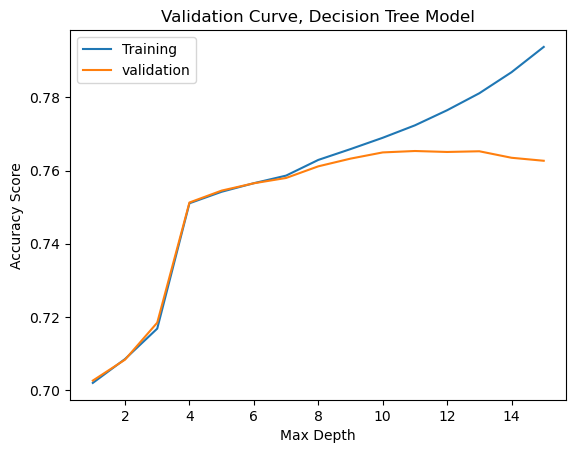

In [95]:
# Choose the most suitable value for depth tree
plt.plot(depth_hyperparams, training_acc, label="Training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve, Decision Tree Model")
plt.legend();

In [96]:
# Decision tree model at depth tree == 10 
final_model_dt = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=10, random_state=42)
)
# Fit model to training data
final_model_dt.fit(X, y)    #final_model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O'...
                                          'mapping': Not attached       1
Attached-1 side    2
Attached-2 side    3
Attached-3 side    4
NaN                5
dtype: int64},
                                         {'col': 'plan_configuration',
         

> # (5)Evaluate

In [97]:
y_test_pred = pd.Series(final_model_dt.predict(X_test))
print(y_test_pred[:5])
print("_"*30)
test_acc = final_model_dt.score(X_test, y_test)
print("test accuracy:", round(test_acc, 2))

0    1
1    1
2    1
3    1
4    0
dtype: int64
______________________________
test accuracy: 0.77


In [98]:
y_test_pred = pd.Series(model_lr.predict(X_test))
print(y_test_pred[:5])
print("_"*30)
test_acc = model_lr.score(X_test, y_test)
print("test accuracy:", round(test_acc, 2))

0    1
1    1
2    1
3    1
4    1
dtype: int64
______________________________
test accuracy: 0.72


> # (6)Communicate

In [99]:
features = X_train.columns
importances = final_model_dt.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['district_id', 'age_building', 'plinth_area_sq_ft'], dtype='object')
Importances: [0.43811504 0.03670241 0.01186075]


In [100]:
feat_imp = pd.Series(importances,index=features)
feat_imp.head()

district_id               0.438115
age_building              0.036702
plinth_area_sq_ft         0.011861
height_ft_pre_eq          0.025410
land_surface_condition    0.005831
dtype: float64

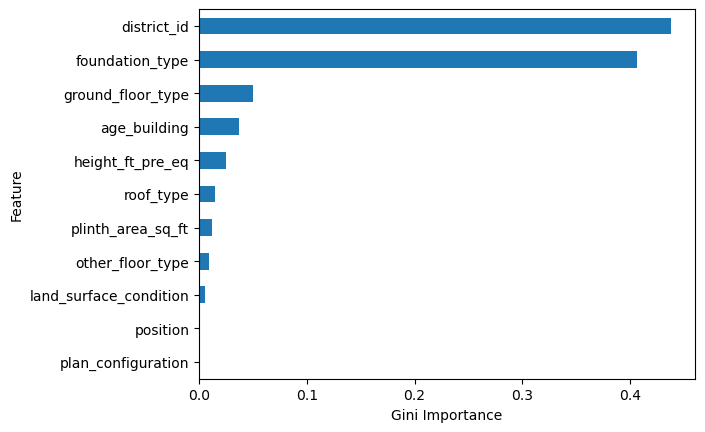

In [101]:
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");